## Author : Loka Akash Reddy
### TechEdu - TIP Data Science October-2021
### Task 1 : Netflix Share Prices
### Dataset : https://drive.google.com/file/d/1uMFpVX-2sXxbzZOCRBnfAD74FXN0oq47/view
### Perform a detailed exploratory data analysis on Netfix share data.
### Importing required Libraries



In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot
%matplotlib inline

import os

pyplot.style.use('fivethirtyeight')
pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 25)

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [3]:
df = pd.read_csv('netflix.csv')

In [4]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429
...,...,...,...,...,...,...,...
4851,2021-08-30,567.159973,556.450012,557.250000,566.179993,2434800.0,566.179993
4852,2021-08-31,569.479980,561.609985,566.119995,569.190002,2431900.0,569.190002
4853,2021-09-01,591.000000,569.000000,569.000000,582.070007,5626200.0,582.070007
4854,2021-09-02,598.760010,583.679993,583.679993,588.549988,6179900.0,588.549988


In [5]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


In [6]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
4851,2021-08-30,567.159973,556.450012,557.250000,566.179993,2434800.0,566.179993
4852,2021-08-31,569.479980,561.609985,566.119995,569.190002,2431900.0,569.190002
4853,2021-09-01,591.000000,569.000000,569.000000,582.070007,5626200.0,582.070007
4854,2021-09-02,598.760010,583.679993,583.679993,588.549988,6179900.0,588.549988
4855,2021-09-03,591.685120,583.140015,585.799988,589.520081,1589628.0,589.520081


In [7]:
df.shape

(4856, 7)

In [8]:
df.isna().sum() # Seems like there's no empty rows

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [9]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [10]:
# Getting information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4856 entries, 0 to 4855
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4856 non-null   object 
 1   High       4856 non-null   float64
 2   Low        4856 non-null   float64
 3   Open       4856 non-null   float64
 4   Close      4856 non-null   float64
 5   Volume     4856 non-null   float64
 6   Adj Close  4856 non-null   float64
dtypes: float64(6), object(1)
memory usage: 265.7+ KB


In [11]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4856.000000,4856.000000,4856.000000,4856.000000,4.856000e+03,4856.000000
mean,104.417595,101.223064,102.841799,102.882117,1.686502e+07,102.882117
std,155.588870,151.003701,153.329766,153.379795,1.939578e+07,153.379795
min,0.410714,0.346429,0.377857,0.372857,2.856000e+05,0.372857
25%,3.971072,3.830357,3.892857,3.893929,6.333750e+06,3.893929
50%,20.756429,20.010715,20.446428,20.429286,1.089410e+07,20.429286
75%,125.750000,122.302502,124.007502,123.742502,2.021828e+07,123.742502
max,598.760010,583.679993,585.799988,589.520081,3.234140e+08,589.520081


In [12]:
df = df.drop(columns=['Adj Close'])

In [13]:
df

,Date,High,Low,Open,Close,Volume
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0
...,...,...,...,...,...,...
4851,2021-08-30,567.159973,556.450012,557.250000,566.179993,2434800.0
4852,2021-08-31,569.479980,561.609985,566.119995,569.190002,2431900.0
4853,2021-09-01,591.000000,569.000000,569.000000,582.070007,5626200.0
4854,2021-09-02,598.760010,583.679993,583.679993,588.549988,6179900.0


In [14]:
# Explore the first 5 rows of the structure Data
df.head().T

,0,1,2,3,4
Date,2002-05-23,2002-05-24,2002-05-28,2002-05-29,2002-05-30
High,1.242857,1.225,1.232143,1.164286,1.107857
Low,1.145714,1.197143,1.157143,1.085714,1.071429
Open,1.156429,1.214286,1.213571,1.164286,1.107857
Close,1.196429,1.21,1.157143,1.103571,1.071429
Volume,104790000.0,11104800.0,6609400.0,6757800.0,10154200.0


In [15]:
# Let's see the Data Type
df.dtypes.to_frame()

,0
Date,object
High,float64
Low,float64
Open,float64
Close,float64
Volume,float64


In [16]:
# Let's see the Statistical Measure of the Data
df.describe(include='all')

,Date,High,Low,Open,Close,Volume
count,4856,4856.000000,4856.000000,4856.000000,4856.000000,4.856000e+03
unique,4856,NaN,NaN,NaN,NaN,NaN
top,2008-01-14,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,104.417595,101.223064,102.841799,102.882117,1.686502e+07
std,NaN,155.588870,151.003701,153.329766,153.379795,1.939578e+07
min,NaN,0.410714,0.346429,0.377857,0.372857,2.856000e+05
25%,NaN,3.971072,3.830357,3.892857,3.893929,6.333750e+06
50%,NaN,20.756429,20.010715,20.446428,20.429286,1.089410e+07
75%,NaN,125.750000,122.302502,124.007502,123.742502,2.021828e+07


In [17]:
df.isna().mean().to_frame()

,0
Date,0.0
High,0.0
Low,0.0
Open,0.0
Close,0.0
Volume,0.0


### Analysis on Open, High, Low, and Close from 2002 - Current Year

Open Stock

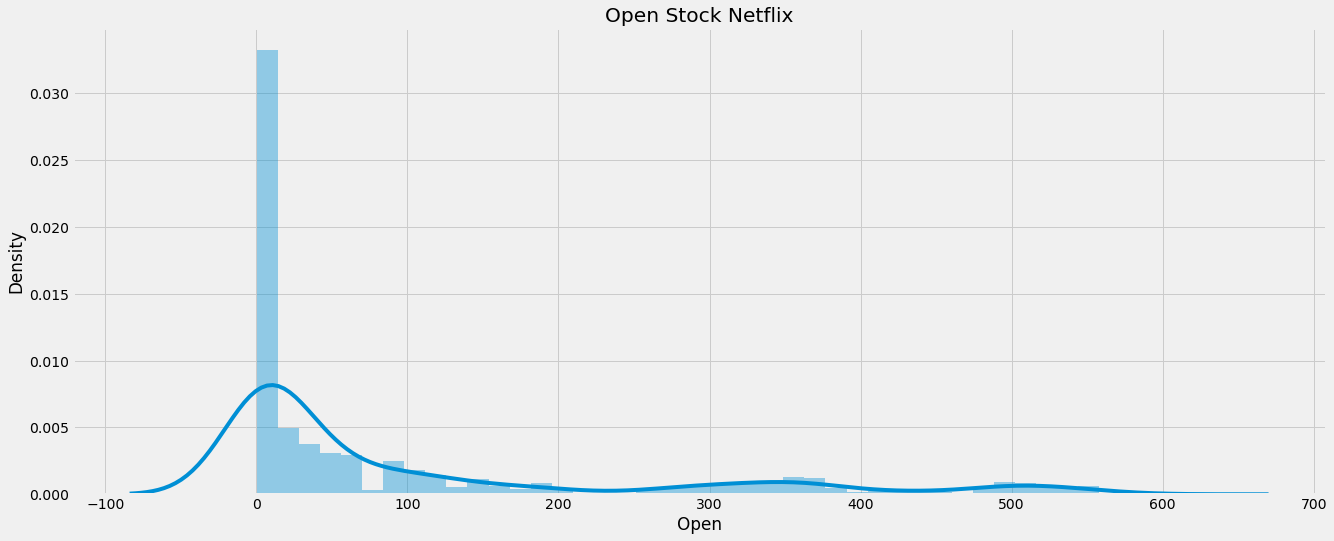

In [18]:
fig, ax = pyplot.subplots(figsize=[20,8])
sns.distplot(df['Open'], ax=ax)
ax.set_title('Open Stock Netflix')
pyplot.show()

High Stock

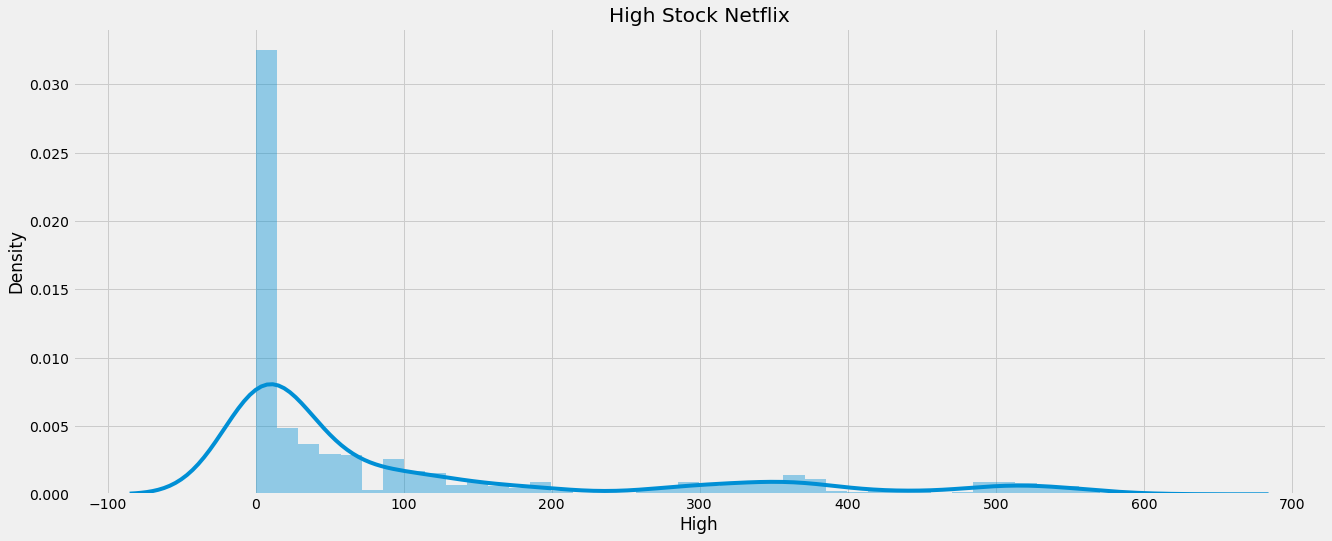

In [19]:
fig, ax = pyplot.subplots(figsize=[20,8])
sns.distplot(df['High'], ax=ax)
ax.set_title('High Stock Netflix')
pyplot.show()

Low Stock

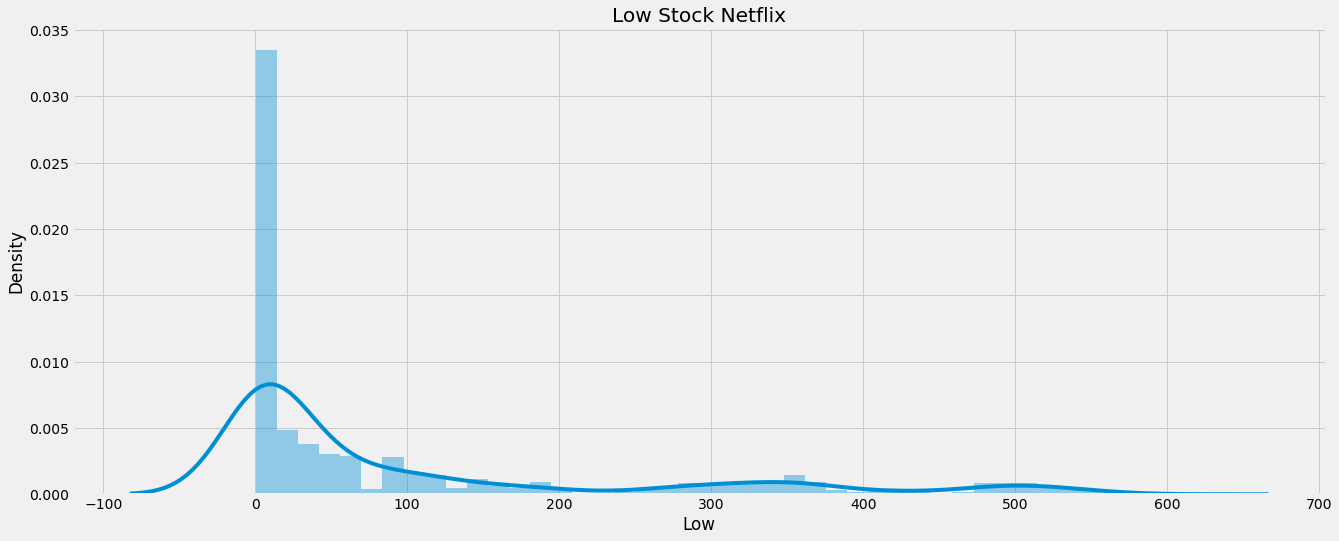

In [20]:
fig, ax = pyplot.subplots(figsize=[20,8])
sns.distplot(df['Low'], ax=ax)
ax.set_title('Low Stock Netflix')
pyplot.show()

Close Stock

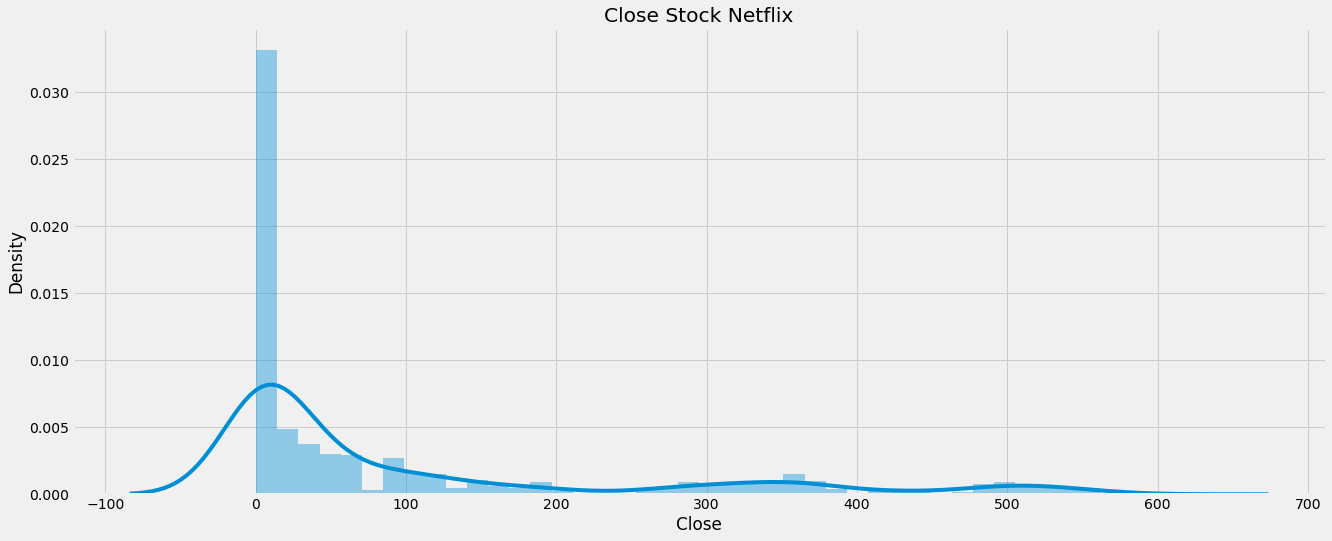

In [21]:
fig, ax = pyplot.subplots(figsize=[20,8])
sns.distplot(df['Close'], ax=ax)
ax.set_title('Close Stock Netflix')
pyplot.show()

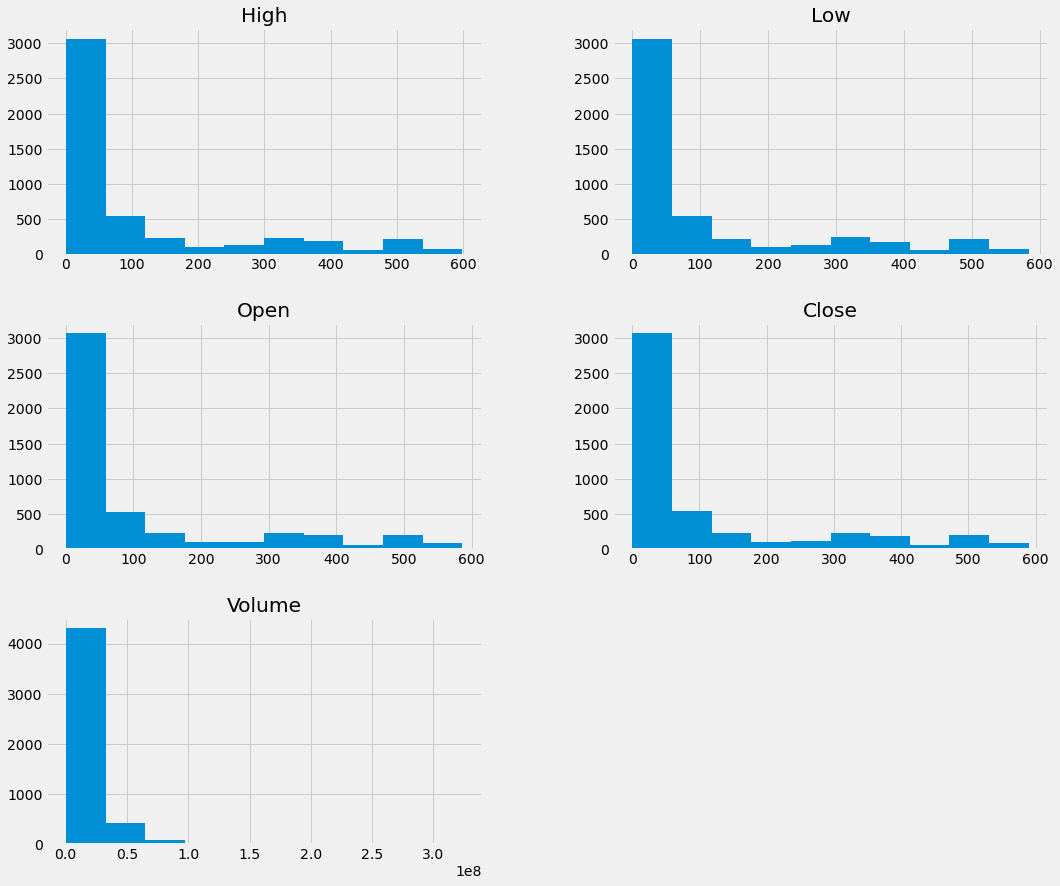

In [22]:
df.hist(figsize=(16, 14))
pyplot.show()

### Data Visualization

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

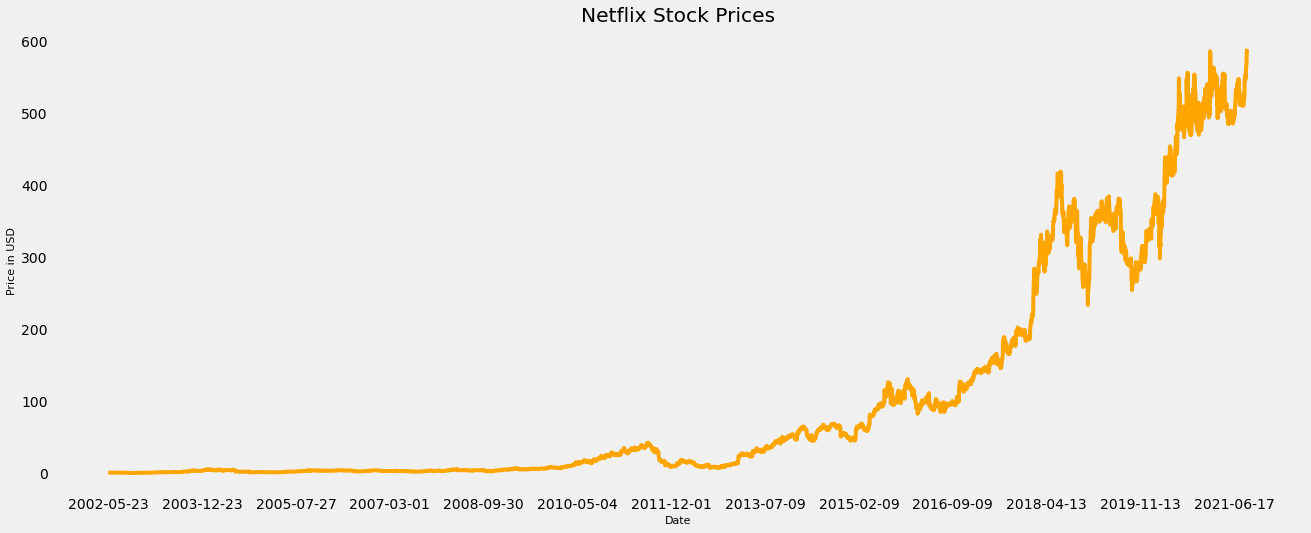

In [24]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Close'], color='Orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Netflix Stock Prices')
plt.grid()
plt.show()

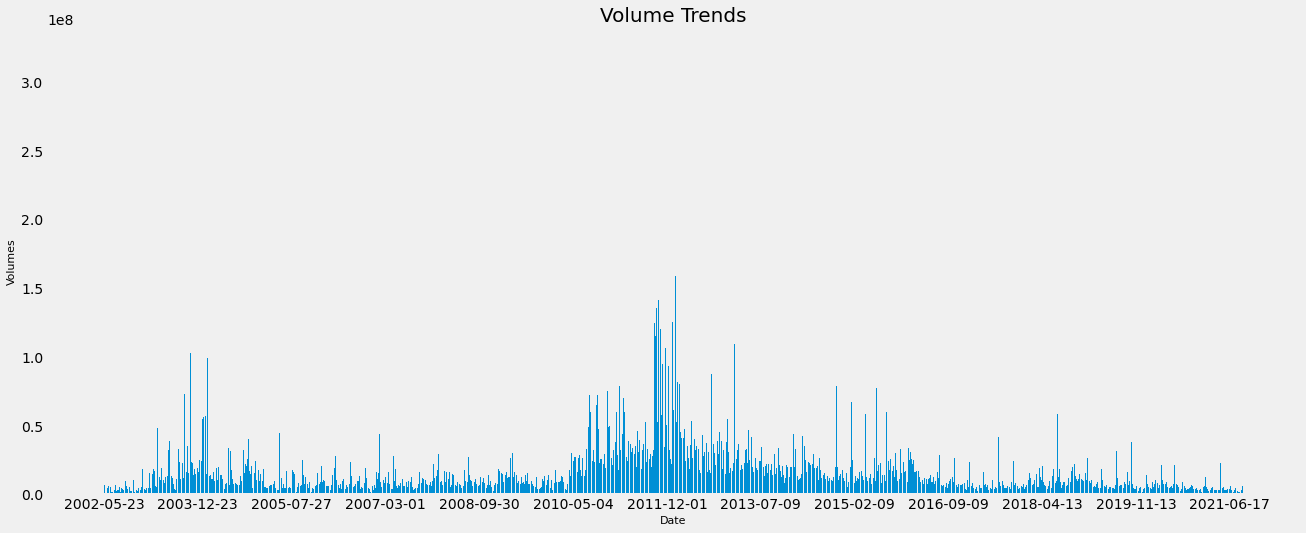

In [25]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df['Date'], df['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends', fontsize='20')
plt.grid()
plt.show()

### Market Capitalization

In [26]:
df['Market Cap'] = df['Open']*df['Volume']

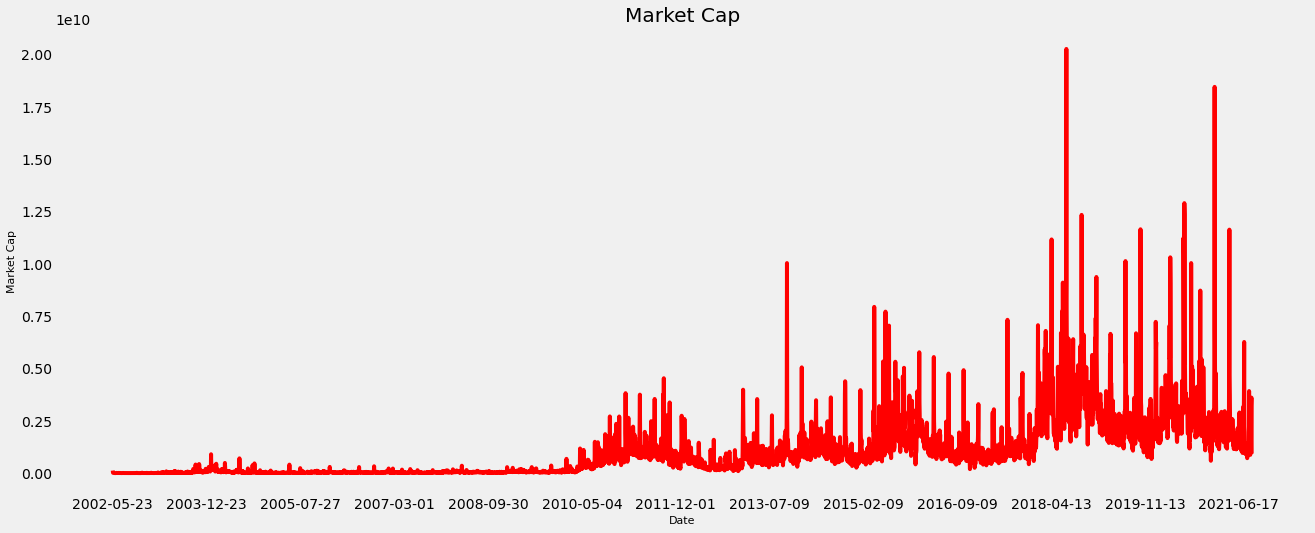

In [27]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Market Cap'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap')
plt.grid()
plt.show()

In [28]:
df.iloc[df['Market Cap'].argmax()]

Date                  2018-07-17
High                       385.0
Low                        344.0
Open                  346.950012
Close                 379.480011
Volume                58410400.0
Market Cap    20265488993.017578
Name: 4065, dtype: object

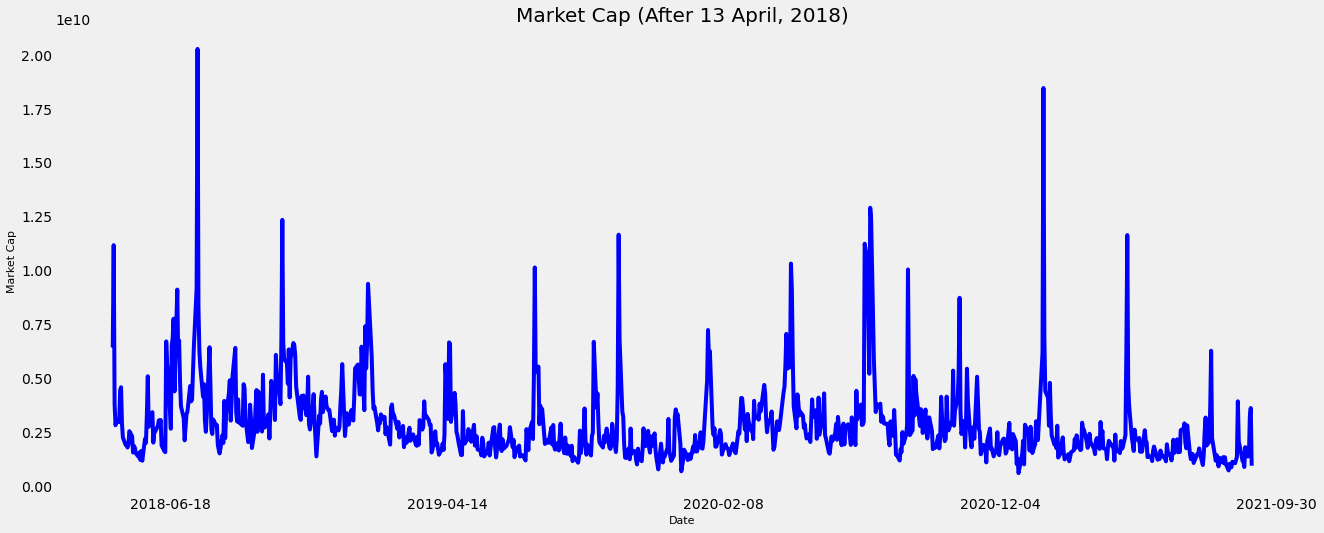

In [29]:
ohlc = df[(df['Date'] > '2018-04-13')]
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format='%Y-%m-%d')

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(ohlc['Date'], ohlc['Market Cap'], color='blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.grid()
plt.title('Market Cap (After 13 April, 2018)', fontsize='20')
plt.show()

### Volatility

In [30]:
df['vol'] = (df['Close']/df['Close'].shift(1)) - 1

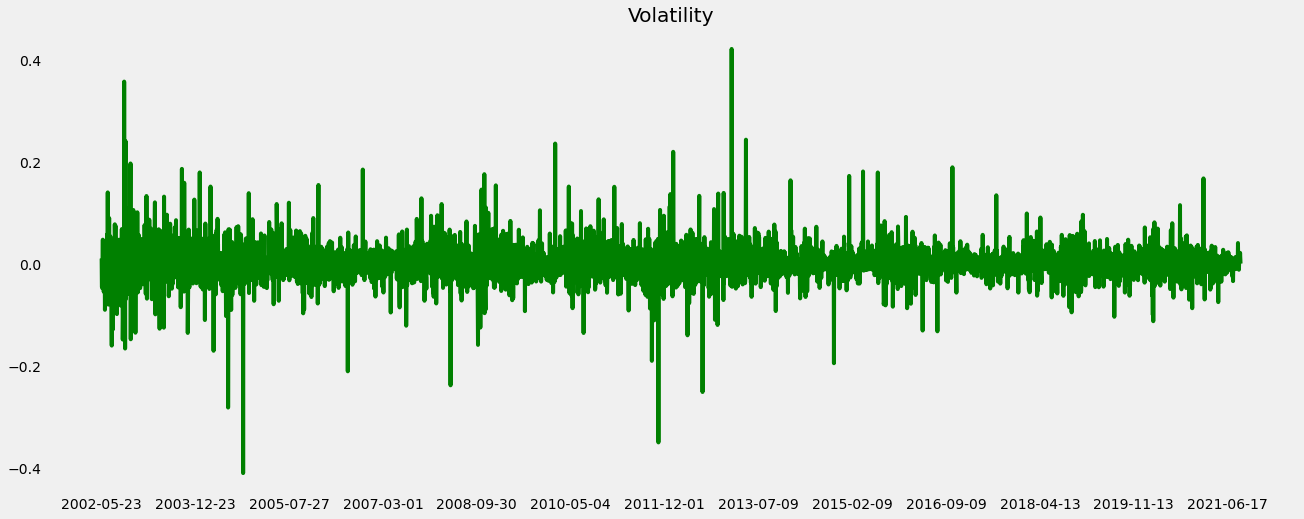

In [31]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['vol'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility')
plt.grid()
plt.show()

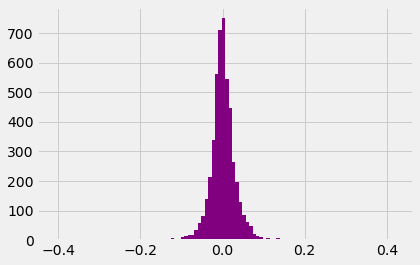

In [32]:
df['vol'].hist(bins=100, color='purple');

### Cumulative Return

In [33]:
df['Cumulative Return'] = (1 + df['vol']).cumprod()

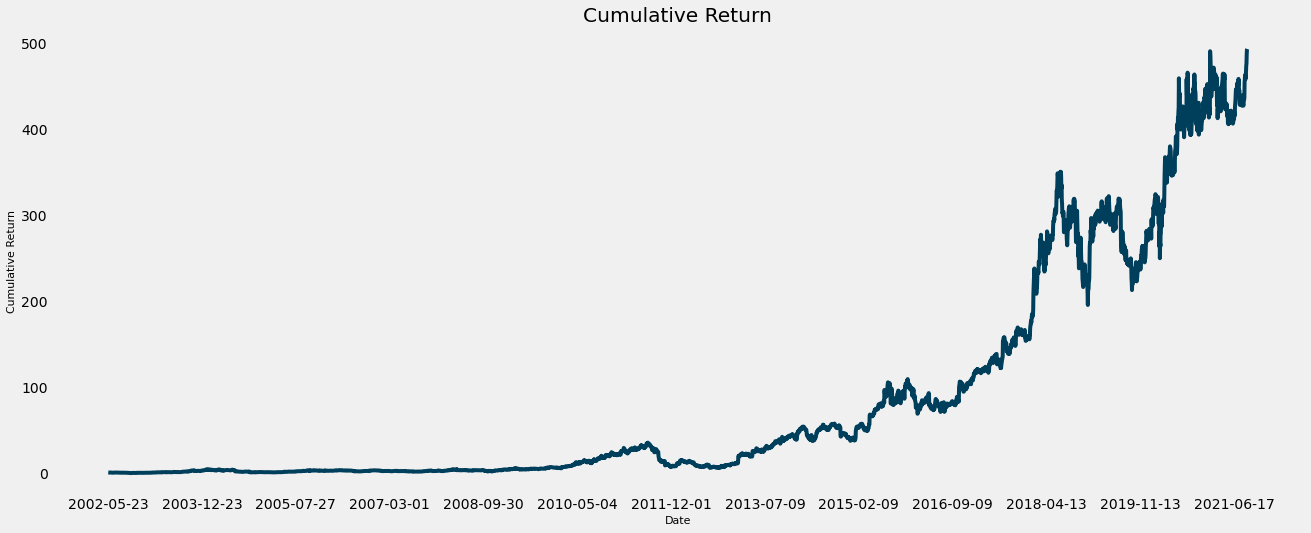

In [34]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Cumulative Return'], color='#003f5c')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.title('Cumulative Return')
plt.grid()
plt.show()

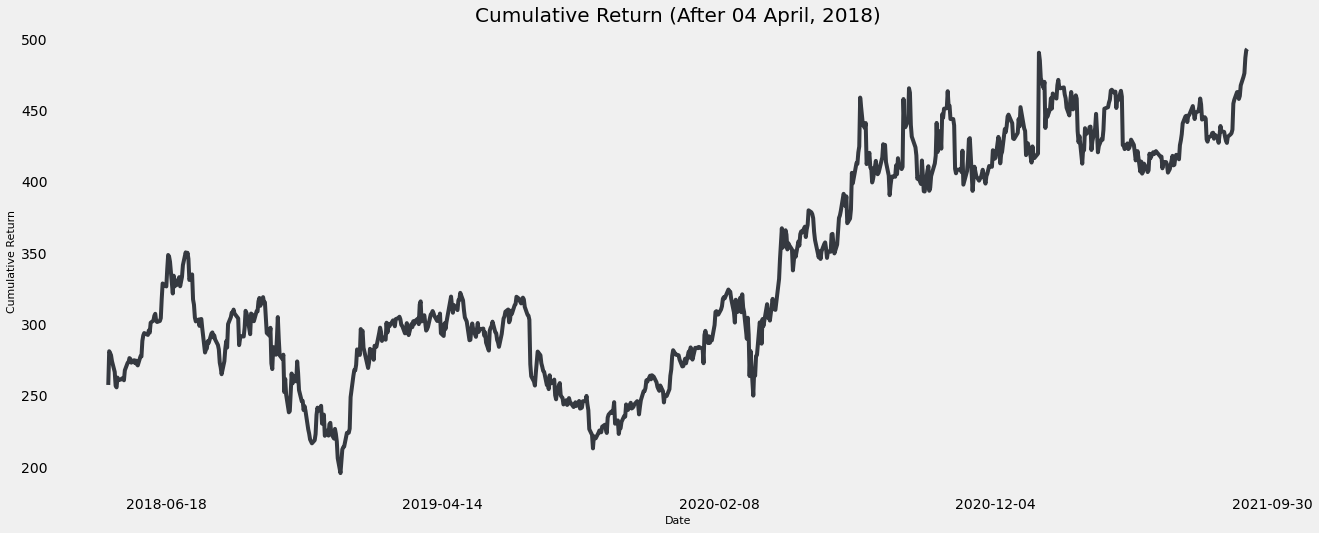

In [35]:
ohlc = df[(df['Date'] > '2018-04-13')]
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Cumulative Return']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format='%Y-%m-%d')

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(ohlc['Date'], ohlc['Cumulative Return'], color='#353940')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.grid()
plt.title('Cumulative Return (After 04 April, 2018)', fontsize='20')
plt.show()

In [36]:
df.iloc[df['Cumulative Return'].argmax()]

Date                       2021-09-03
High                        591.68512
Low                        583.140015
Open                       585.799988
Close                      589.520081
Volume                      1589628.0
Market Cap           931204062.995361
vol                          0.001648
Cumulative Return          492.733019
Name: 4855, dtype: object

## Thank You